### Imputer
Preprocessing 中的Imputer 在新的 sklearn版本中被移走了，我用 Impute 中的 SimpleImputer method 代替。
功能是把missing value補上，主要參數有 missing_values: 可以是pandas.NA/numpy.nan, 這些值會被替換掉。
Strategy: 要用甚麼替換，可以是 mean, median, most_frequent, constant。 如果選擇用constant那麼 missing value 會被 fill_value參數設定的數值取代。

In [2]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

data = pd.read_csv('duke_gpa.csv').drop('gender', axis=1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(data)
data_imputed = imputer.transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

### Train Test Split / Sample without replacement
train_test_split 會把dataset根據我設定的比例分成 訓練用與測試用。可以用來評估我訓練的model表現如何。
主要用到的param 是 test size/train size，兩者預設為complement 且在0~1之間，代表多少比例分別要用在 訓練與測試模型。


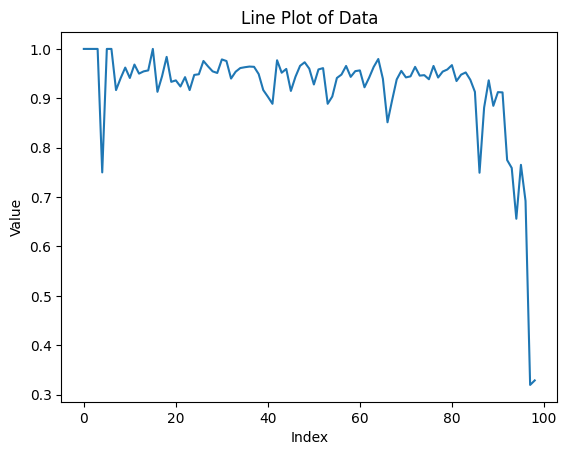

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = []

# Load the iris dataset
iris = load_iris()
for i in range(1, 100):
    hist = 0
    
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=(i/100)) # use 0.2 for better accuracy
    
    classifier = DecisionTreeClassifier()
    for itr in range(600):
        # train
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        # Calculate the accuracy of the classifier on the testing set
        accuracy = accuracy_score(y_test, y_pred)
        hist += accuracy

    # print('Accuracy:', accuracy)
    data.append(hist/600)

plt.plot(data)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Data')
plt.show()

### Binarizer / One-Hot Encoder
Binarizer 會把資料轉換成 0/1. 主要參數為 threshold.
如果data value 大於threshold 則會被轉換成1，小於等於換成0。Threshold 預設值為0.
OneHotEncoder 則會


In [8]:
from sklearn.preprocessing import Binarizer

# Binarize data
data = [[2], [1], [3], [0]]
binarizer = Binarizer(threshold=1.5)
data_binarized = binarizer.transform(data)

print(data_binarized.tolist())

[[1], [0], [1], [0]]
